# Poland car prices prediction

## > Problem overview

There comes a time in most of us' lives when we decide to buy or sell a car. Unfortunately, not all of us are an automotive expert and the proper price determination of our vehicle may be difficult. Machine learning can help.

Avaiable dataset: <br>
https://www.kaggle.com/bartoszpieniak/poland-cars-for-sale-dataset

At the very beginning, let's analyze what variables can affect the price of the vehicle (in places where I did not specify such an impact, I assumed it was low or close to zero).

- Index - unique offer index. Probably without meaning for models.
- Price - car price - a value with that will be predicted.
- Currency - currency in the offer price. Mostly in PLN, but there will also be a few offers in euro.

- Condition - new or used. Most likely a high price impact. Many of the more expensive cars lose 30-40% in value within the first three years of use.
- Vehicle_brand - vehicle brand in the offer. Average price impact most likely.
- Vehicle_model - vehicle model on offer. Low price impact most likely.
- Vehicle_generation - vehicle generation in the offer.
- Vehicle_version - version of the vehicle on offer.
- Production_year - production year. Most likely a high price impact. Many of the more expensive cars lose 30-40% in value within the first three years of use.
- Mileage_km - the number of kilometers traveled. Also high impact and will probably correlate with the year of production.
- Power_HP - engine power in horse power. Average price impact.

- Displacement_cm3 - engine size in cubic centimeters. It seems to me that it has a big influence on the price as it is the basic information about the engine.
- Fuel_type - type of fuel. Low impact?
- CO2_emissions - CO2 emissions in g / km.
- Drive - car drive (e.g. to the front / rear wheels)
- Transmission - type of gearbox
- Type - type of bodywork (sedan, hatchback, etc.)

- Doors_number - number of doors in the car.
- Color - color of the car body.
- Origin_country - country of origin of the car.
- First_owner - whether the seller is the first owner
- First_registration_date - first registration date
- Offer_publication_date - offer publication date
- Offer_location - seller's address
- Features - a list of additional (ABS, trunk, parking sensors, etc.). Possible average impact on the price.

In summary, it seems to me that the following variables will play a key role in predicting values: <br>
1. Condition
2. Vehicle_brand
3. Production_year
4. Mileage_km
5. Displacement_cm3

## > Notebook overview
1. Reading and Understanding the Data
2. Data Cleaning and Preparation
3. Visualizing the Data
    1. Numerical variables
    2. Categorical variables
4. Bivariate Analysis
5. Feature Engineering
6. Data Preprocessing for Model
7. Model Building
8. Model Tuning

In [1]:
%config Completer.use_jedi = False

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats

sns.set() 

In [2]:
pd.options.display.float_format = '{:.3f}'.format

## 1. Reading and Understanding the Data >>

In [3]:
raw_data = pd.read_csv('data/poland_car_prices.csv')
raw_data.head()

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,...,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.000,...,Manual,small_cars,3.000,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.000,...,Manual,coupe,2.000,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.000,...,Automatic,small_cars,3.000,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,NaN,2012,29000.000,...,Manual,small_cars,3.000,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,NaN,2021,600.000,...,Manual,small_cars,3.000,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."


In [4]:
raw_data.columns

Index(['Index', 'Price', 'Currency', 'Condition', 'Vehicle_brand',
       'Vehicle_model', 'Vehicle_version', 'Vehicle_generation',
       'Production_year', 'Mileage_km', 'Power_HP', 'Displacement_cm3',
       'Fuel_type', 'CO2_emissions', 'Drive', 'Transmission', 'Type',
       'Doors_number', 'Colour', 'Origin_country', 'First_owner',
       'First_registration_date', 'Offer_publication_date', 'Offer_location',
       'Features'],
      dtype='object')

In [5]:
raw_data.shape

(208304, 25)

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208304 entries, 0 to 208303
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    208304 non-null  int64  
 1   Price                    208304 non-null  int64  
 2   Currency                 208304 non-null  object 
 3   Condition                208304 non-null  object 
 4   Vehicle_brand            208304 non-null  object 
 5   Vehicle_model            208304 non-null  object 
 6   Vehicle_version          138082 non-null  object 
 7   Vehicle_generation       147860 non-null  object 
 8   Production_year          208304 non-null  int64  
 9   Mileage_km               207321 non-null  float64
 10  Power_HP                 207661 non-null  float64
 11  Displacement_cm3         206338 non-null  float64
 12  Fuel_type                208304 non-null  object 
 13  CO2_emissions            94047 non-null   float64
 14  Driv

In [7]:
raw_data.describe()

,Index,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,CO2_emissions,Doors_number
count,208304.000,208304.000,208304.000,207321.000,207661.000,206338.000,94047.000,206817.000
mean,104151.500,63053.834,2012.098,150276.764,151.836,1882.567,319156.381,4.637
std,60132.330,86659.673,6.998,2937446.805,77.684,729.610,72913958.705,0.769
min,0.000,500.000,1915.000,1.000,1.000,400.000,1.000,1.000
25%,52075.750,17800.000,2008.000,53000.000,105.000,1461.000,120.000,5.000
50%,104151.500,35700.000,2013.000,144566.000,136.000,1798.000,140.000,5.000
75%,156227.250,75990.000,2017.000,206000.000,172.000,1997.000,164.000,5.000
max,208303.000,6999000.000,2021.000,1111111111.000,1398.000,8400.000,20000000000.000,55.000


## 2. Data cleaning and Preparation >>

In [8]:
data = raw_data.copy()

### Missing values

In [9]:
# missing values table
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Percent'] > 0]

,Total,Percent
First_owner,143210,0.688
First_registration_date,121859,0.585
CO2_emissions,114257,0.549
Origin_country,89992,0.432
Vehicle_version,70222,0.337
Vehicle_generation,60444,0.290
Drive,15076,0.072
Displacement_cm3,1966,0.009
Doors_number,1487,0.007
Mileage_km,983,0.005


In [10]:
def dealWithMissingValues(data):
    # Drive - fill in with mode
    mode = data['Drive'].mode()[0]
    data['Drive'].fillna(mode, inplace=True)
    
    # Displacement_cm3 - fill in with median
    median = data['Displacement_cm3'].median()
    data['Displacement_cm3'].fillna(median, inplace=True)
    
    # Doors_number - fill in with median
    median = data['Doors_number'].median()
    data['Doors_number'].fillna(median, inplace=True)
    
    # Mileage_km, Power_HP, Transmission, - dropna
    data.dropna(subset=['Mileage_km'], inplace=True)
    data.dropna(subset=['Power_HP'], inplace=True)
    data.dropna(subset=['Transmission'], inplace=True)
    
    # Drop entire columns
    data.drop([
        'First_owner', 'First_registration_date', 'CO2_emissions', 'Origin_country', 
        'Vehicle_generation', 'Vehicle_version',
    ], axis=1, inplace=True)
    
    return data

In [11]:
data = dealWithMissingValues(data)

For 'First_owner', 'First_registration_date', 'CO2_emissions', 'Origin_country', 'Vehicle_generation', 'Vehicle_version' percent of missing data was greater than 0.15, so I dropped entire columns. Moreover, features like 'CO2_emissions' can be difficult to quantify for simple people so we cannot assume that they are in 100% correct.

In [12]:
print(f"Missing data: {data.isnull().sum().max()}")

Missing data: 0


### Declare variables of interest

In [13]:
data.drop(['Index', 'Offer_location'], axis=1, inplace=True)

### Removing incorrect values

Some of rows stores incorrect data. I assumed that 55-doors cars don't exists but no matter of I am right, they are outliers so they are unnecessary for our models. Data exploration also will be much more comfortable without them. 

In [14]:
data.describe()

,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,Doors_number
count,206560.000,206560.000,206560.000,206560.000,206560.000,206560.000
mean,62330.435,2012.071,150287.730,151.567,1882.111,4.639
std,85123.718,6.965,2942846.997,77.295,726.914,0.767
min,500.000,1915.000,1.000,1.000,400.000,1.000
25%,17700.000,2008.000,53000.000,105.000,1482.000,5.000
50%,35500.000,2013.000,144500.000,136.000,1798.000,5.000
75%,75300.000,2017.000,206000.000,170.000,1997.000,5.000
max,6999000.000,2021.000,1111111111.000,1398.000,8400.000,55.000


Doors number

In [15]:
data['Doors_number'].sort_values(ascending=False).head(8)

207984   55.000
186721   55.000
132930   10.000
173559    9.000
185270    9.000
132334    7.000
152622    7.000
92596     7.000
Name: Doors_number, dtype: float64

In [16]:
to_drop = data[data['Doors_number'] > 9].index.tolist()
to_drop.extend(
    data[data['Doors_number'] == 1].index.tolist()
)
data.drop(to_drop, axis=0, inplace=True)

Mileage_km

In [17]:
data['Mileage_km'].sort_values(ascending=False).head(10)

127757   1111111111.000
132914    500000000.000
208293    500000000.000
192119    206549168.000
66255      99999999.000
19053      11111111.000
37032      10000000.000
132958      9999999.000
19489       2930000.000
85929       2819436.000
Name: Mileage_km, dtype: float64

In [18]:
to_drop = data[data['Mileage_km'] >= 999999].index.tolist()
data.drop(to_drop, axis=0, inplace=True)

Production_year

In [19]:
data[data['Production_year'] < 1950].shape[0]

52

In [20]:
to_drop = data[data['Production_year'] < 1950].index.tolist()
data.drop(to_drop, axis=0, inplace=True)

Price

In [21]:
data[data['Price'] > 2500000].shape[0]

2

In [22]:
to_drop = data[data['Price'] > 2500000].index.tolist()
data.drop(to_drop, axis=0, inplace=True)

After cleaning:

In [23]:
data.describe()

,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,Doors_number
count,206456.000,206456.000,206456.000,206456.000,206456.000,206456.000
mean,62284.422,2012.094,138226.838,151.590,1881.962,4.639
std,83564.913,6.843,96974.599,77.275,726.564,0.750
min,500.000,1950.000,1.000,1.000,400.000,2.000
25%,17700.000,2008.000,53000.000,105.000,1482.000,5.000
50%,35500.000,2013.000,144500.000,136.000,1798.000,5.000
75%,75300.000,2017.000,206000.000,170.000,1997.000,5.000
max,2370000.000,2021.000,958742.000,1398.000,8400.000,9.000


## 2. Visualizing the Data >>

### Numerical variables

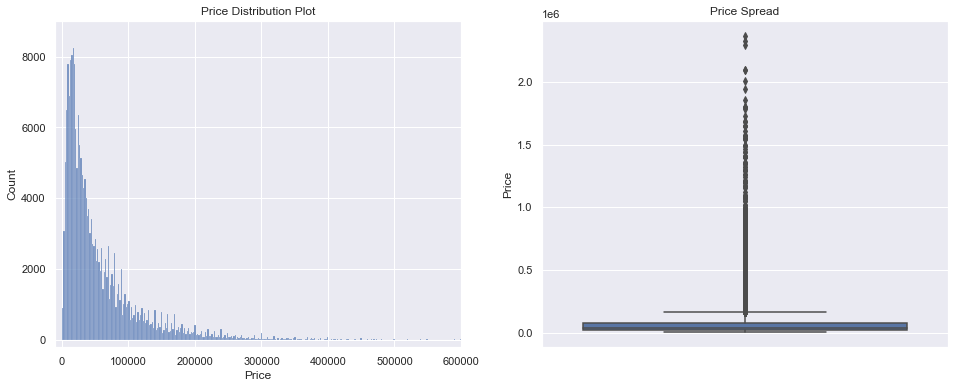

In [24]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.xlim(-10000, 600000)
plt.ylim(-200, 9000)
plt.title('Price Distribution Plot')
sns.histplot(data['Price'])

plt.subplot(1,2,2)
plt.title('Price Spread')
sns.boxplot(y=data['Price'])

plt.show()

In [25]:
data['Price'].describe()

count    206456.000
mean      62284.422
std       83564.913
min         500.000
25%       17700.000
50%       35500.000
75%       75300.000
max     2370000.000
Name: Price, dtype: float64

In [26]:
skew = data['Price'].skew()
kurt = data['Price'].kurt()
print(f'Skewness: {skew}')
print(f'Kurtosis: {kurt}')

Skewness: 5.2351247675024295
Kurtosis: 55.763430310155535


1. Price distribution is positive skewed. Probably performing a log transformation will be right decision.
2. There is a very big difference between mean and median.

array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Production_year'}>],
       [<AxesSubplot:title={'center':'Mileage_km'}>,
        <AxesSubplot:title={'center':'Power_HP'}>],
       [<AxesSubplot:title={'center':'Displacement_cm3'}>,
        <AxesSubplot:title={'center':'Doors_number'}>]], dtype=object)

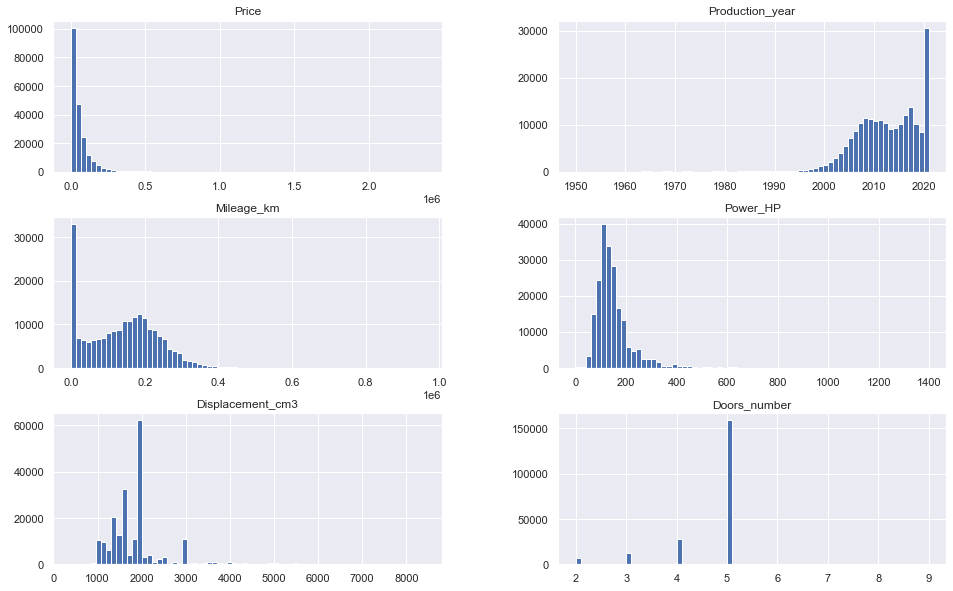

In [27]:
data.hist(figsize=(16,10), bins=70)

In [28]:
data['Mileage_km'].describe(percentiles=[0.12, 0.25, 0.50, 0.75])

count   206456.000
mean    138226.838
std      96974.599
min          1.000
12%        300.000
25%      53000.000
50%     144500.000
75%     206000.000
max     958742.000
Name: Mileage_km, dtype: float64

There is a significant amount of variables with 'Mileage_km' less than 10 km and 'Production_year' equals to 2020 which can be a result of cars described as "new" in 'Condition' column. 

In [29]:
new_cars = data[data['Condition'] == 'New']
percent = round(new_cars.shape[0] / data.shape[0], 2) * 100
print(f'New cars: {percent}% of dataset')
print(f'New cars mileage mean: {new_cars.Mileage_km.mean()} km')

New cars: 12.0% of dataset
New cars mileage mean: 101.0314393319142 km


The proportions agree with each other. New cars are responsible for high mileage saturation below 10 km.

### Categorical variables

In [30]:
data.columns

Index(['Price', 'Currency', 'Condition', 'Vehicle_brand', 'Vehicle_model',
       'Production_year', 'Mileage_km', 'Power_HP', 'Displacement_cm3',
       'Fuel_type', 'Drive', 'Transmission', 'Type', 'Doors_number', 'Colour',
       'Offer_publication_date', 'Features'],
      dtype='object')

<AxesSubplot:xlabel='Fuel_type', ylabel='count'>

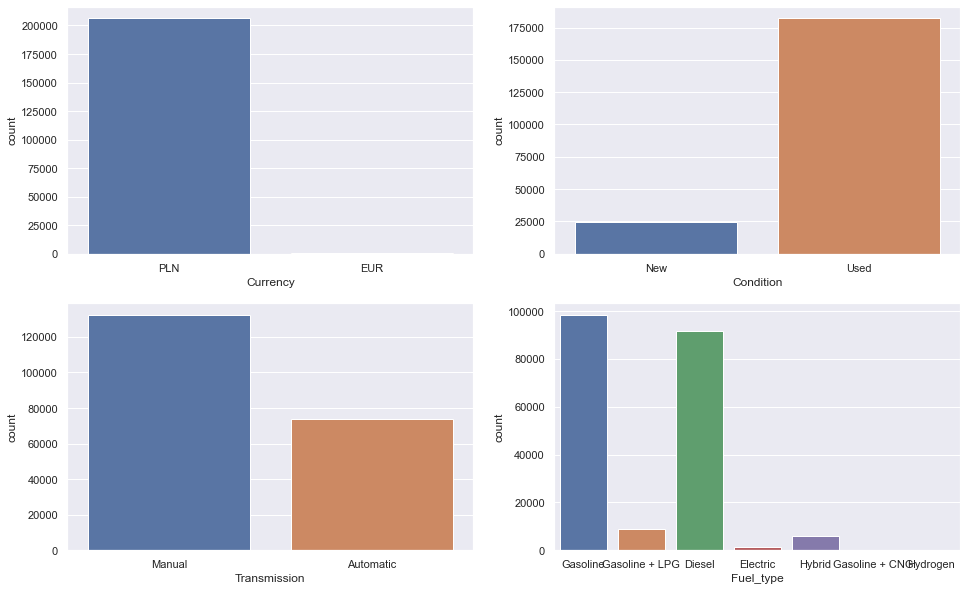

In [31]:
plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
sns.countplot(x=data['Currency'])

plt.subplot(2,2,2)
sns.countplot(x=data['Condition'])

plt.subplot(2,2,3)
sns.countplot(x=data['Transmission'])

plt.subplot(2,2,4)
sns.countplot(x=data['Fuel_type'])

<AxesSubplot:xlabel='Drive', ylabel='count'>

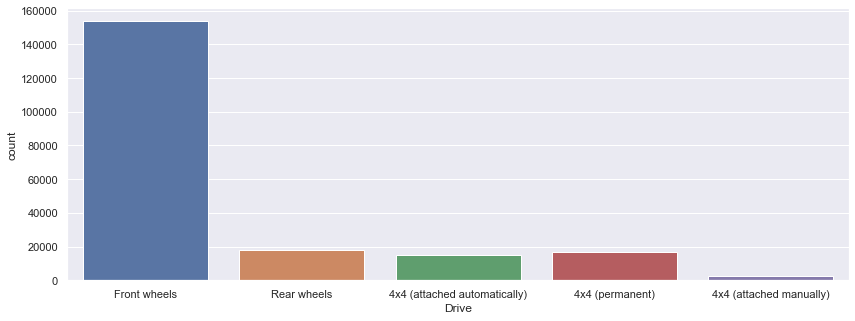

In [32]:
plt.figure(figsize=(14,5))
sns.countplot(x=data['Drive'])

<AxesSubplot:xlabel='Type', ylabel='count'>

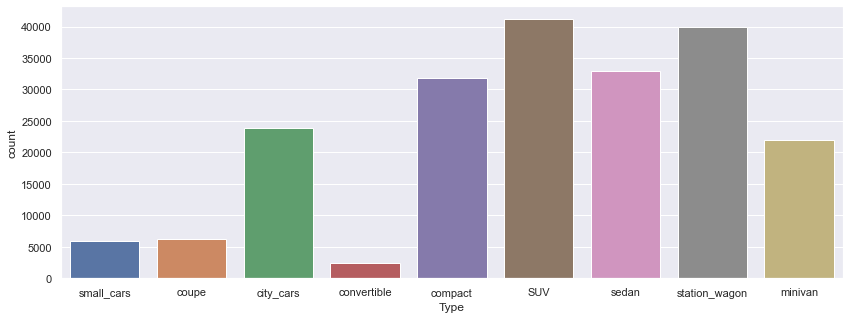

In [33]:
plt.figure(figsize=(14,5))
sns.countplot(x=data['Type'])

In [34]:
data.Vehicle_brand.value_counts(ascending=False)[:10]

Volkswagen       18212
BMW              16827
Audi             16414
Opel             16228
Ford             15930
Mercedes-Benz    11987
Renault          10651
Toyota           10175
Škoda            10117
Peugeot           8975
Name: Vehicle_brand, dtype: int64

<AxesSubplot:>

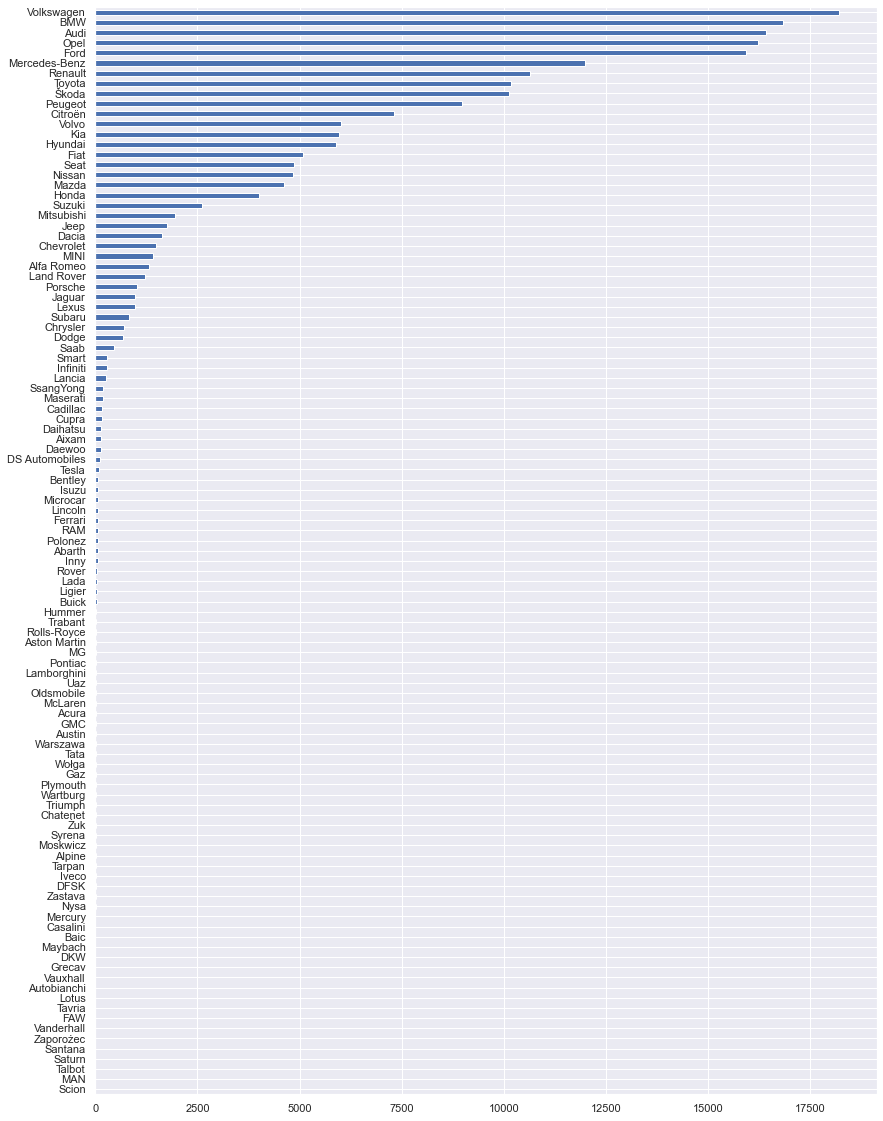

In [35]:
data.Vehicle_brand.value_counts(ascending=True).plot(kind = 'barh', figsize=(14,20))

## 3. Bivariate analysis >>

<AxesSubplot:>

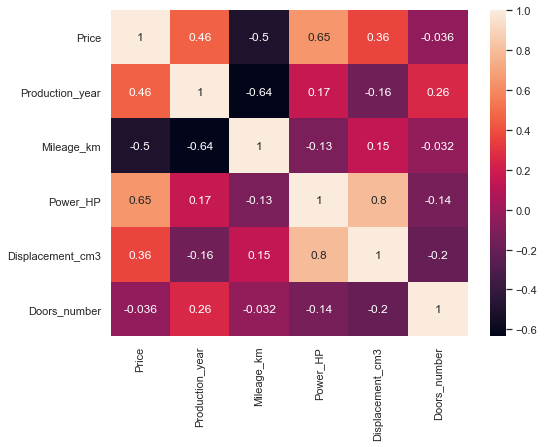

In [36]:
corr_frame = data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_frame, annot=True)

1. Usually car mileage should correlate with price but in dataset. 
2. 'Displacement_cm3' and 'Power_HP' correlate with each other. Also 'Mileage_km' are negatively correlated with 'Production_year'. We should remember to prevent multicollinearity by performing linear regression.

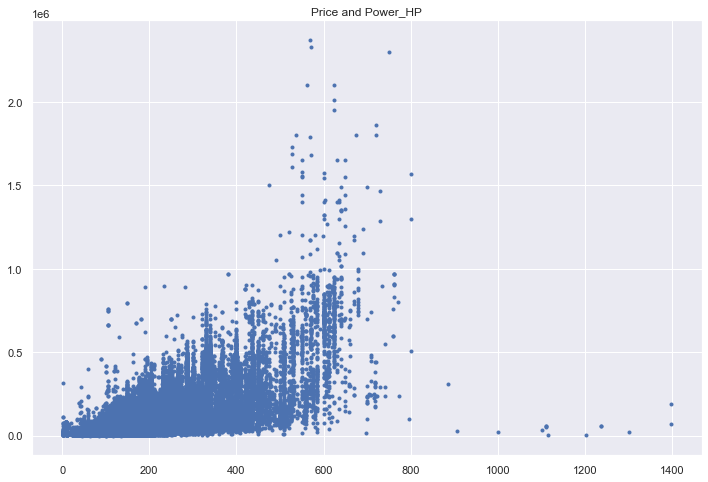

In [37]:
plt.figure(figsize=(12,8))
plt.title('Price and Power_HP')
plt.scatter(data['Power_HP'], data['Price'], marker='.')
plt.show()

Maybe we should try to remove outliers?

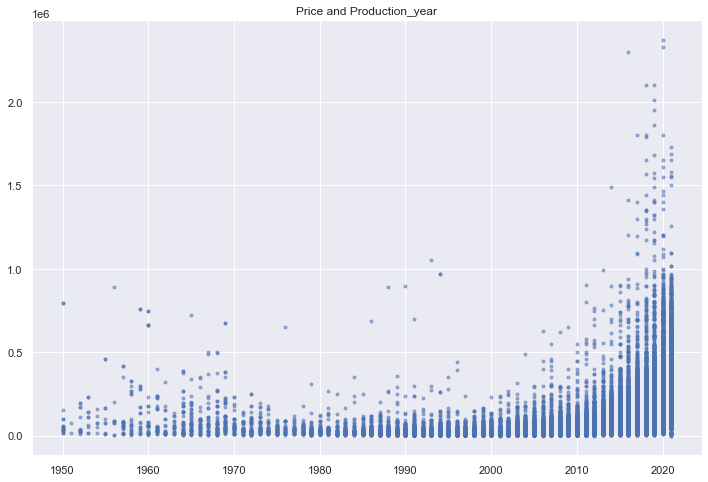

In [38]:
plt.figure(figsize=(12,8))
plt.title('Price and Production_year')
plt.scatter(data['Production_year'], data['Price'], marker='.', alpha=0.5)
plt.show()

A lot of new cars have a low price, which I was definitely not expecting to see.

Let's zoom a little.

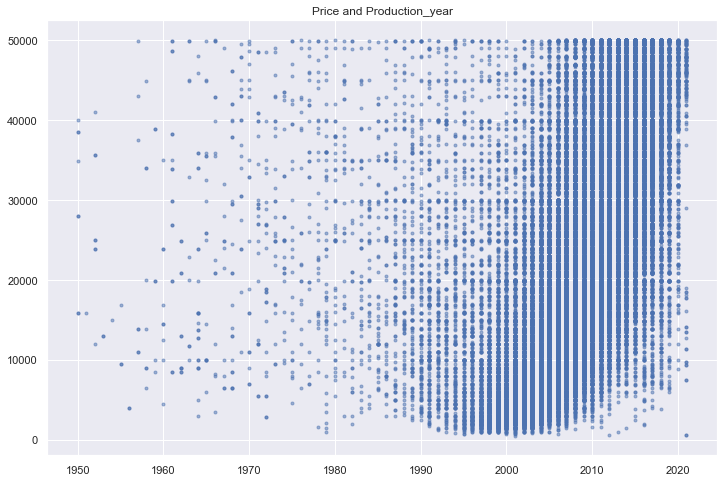

In [39]:
small_price = data[data['Price'] < 50000]
plt.figure(figsize=(12,8))
plt.title('Price and Production_year')
plt.scatter(small_price['Production_year'], small_price['Price'], marker='.', alpha=0.5)
plt.show()

Now we can see that there are not so many new cars with a low price. These exceptions to the rule may be accident cars for sale.

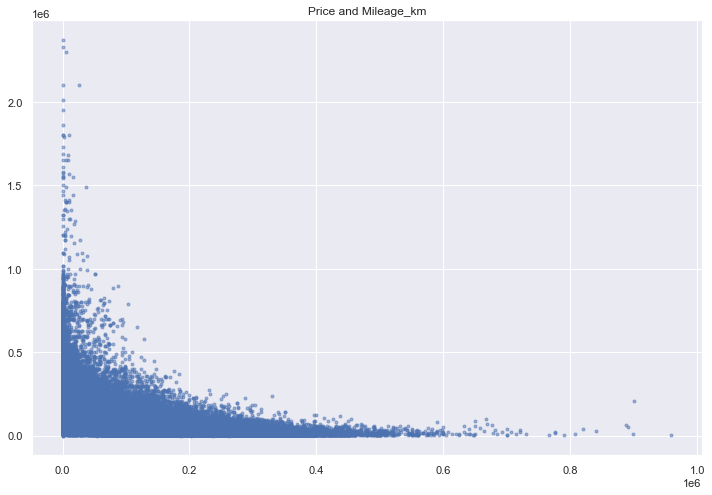

In [40]:
plt.figure(figsize=(12,8))
plt.title('Price and Mileage_km')
plt.scatter(data['Mileage_km'], data['Price'], marker='.', alpha=0.5)
plt.show()

## 4. Feature engineering >>

In [41]:
def dealWithOutliers(data):
    # remove outliers
#     q = data['Price'].quantile(0.99) 
#     data = data[data['Price'] < q]
    
    to_drop = data[data['Production_year'] < 1970].index.tolist()
    data.drop(to_drop, axis=0, inplace=True)
    
    q = data['Mileage_km'].quantile(0.995) 
    data = data[data['Mileage_km'] < q]
    
    q = data['Power_HP'].quantile(0.99) 
    data = data[data['Power_HP'] < q]
    
    q = data['Displacement_cm3'].quantile(0.99) 
    data = data[data['Displacement_cm3'] < q]
    
    return data

In [42]:
def showSummaryTable(train, test):
    missing_values_train = train.isnull().sum().max()
    missing_values_test = test.isnull().sum().max()
    
    summary = pd.DataFrame({
        'Train' : [data_train.shape[0], train.shape[0], missing_values_train], 
        'Test' : [data_test.shape[0], test.shape[0], missing_values_test]
    }, index=['Size before', 'Size after', 'Missing values'])
    
    return summary

In [43]:
# copy
data_preprocessed = data.copy()

# outliers
data_preprocessed = dealWithOutliers(data_preprocessed)

In [44]:
data.shape

(206456, 17)

In [45]:
data_preprocessed.shape

(200807, 17)

### Log Transformation

In [46]:
def showProbPlotAndDistPlot(column):
    sns.histplot(column);
    fig = plt.figure()
    res = stats.probplot(column, plot=plt)

Price

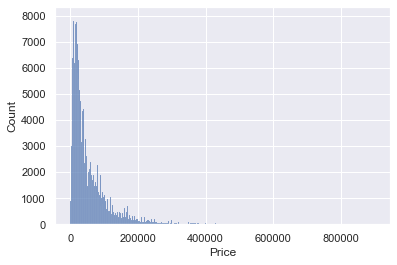

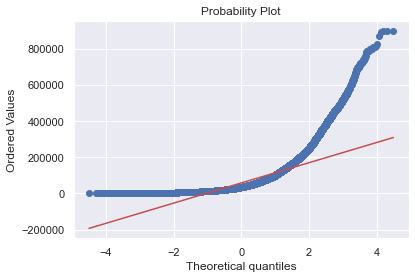

In [47]:
showProbPlotAndDistPlot(data_preprocessed['Price'])

In [48]:
data_preprocessed['Price'] = np.log(data_preprocessed['Price'])

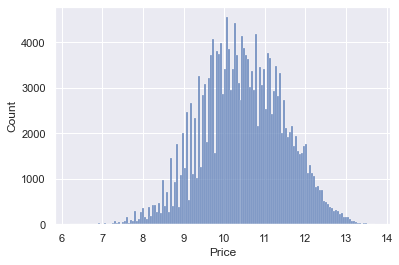

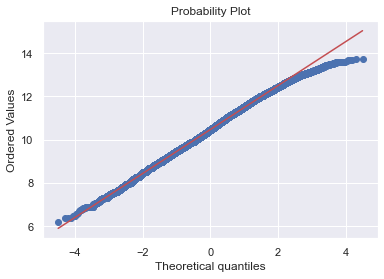

In [49]:
showProbPlotAndDistPlot(data_preprocessed['Price'])

In [50]:
data_preprocessed.columns

Index(['Price', 'Currency', 'Condition', 'Vehicle_brand', 'Vehicle_model',
       'Production_year', 'Mileage_km', 'Power_HP', 'Displacement_cm3',
       'Fuel_type', 'Drive', 'Transmission', 'Type', 'Doors_number', 'Colour',
       'Offer_publication_date', 'Features'],
      dtype='object')

array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Production_year'}>],
       [<AxesSubplot:title={'center':'Mileage_km'}>,
        <AxesSubplot:title={'center':'Power_HP'}>],
       [<AxesSubplot:title={'center':'Displacement_cm3'}>,
        <AxesSubplot:title={'center':'Doors_number'}>]], dtype=object)

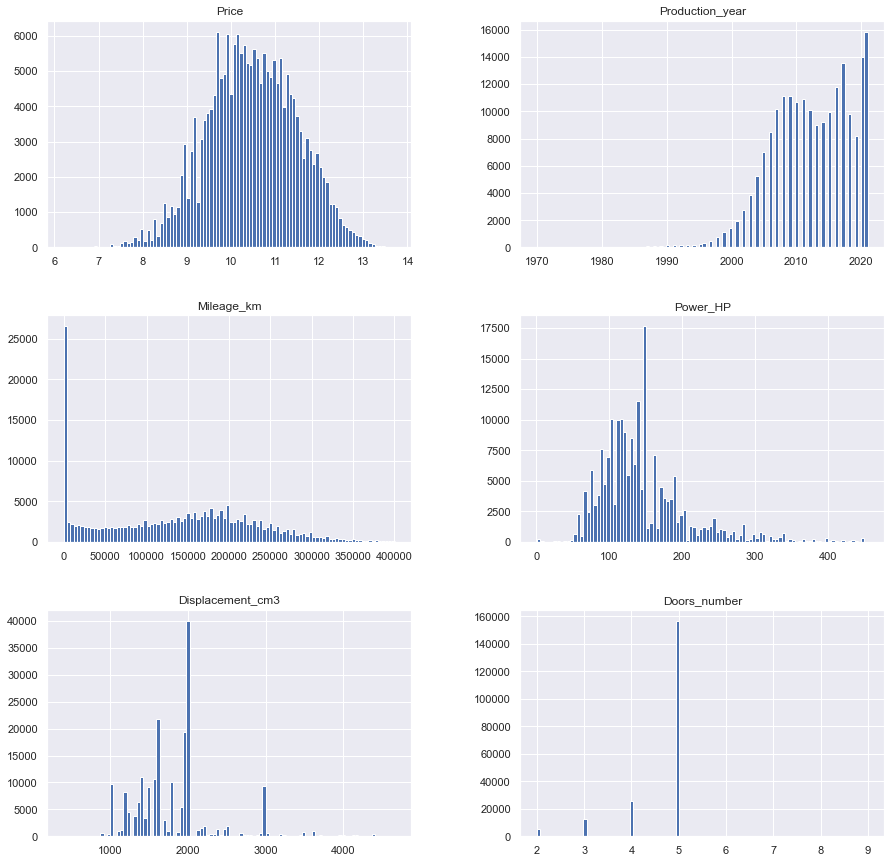

In [51]:
data_preprocessed.hist(figsize=(15,15),bins=100)

In [52]:
data_preprocessed.drop(['Currency', 'Vehicle_model', 'Fuel_type', 
                        'Drive', 'Type', 'Doors_number', 'Colour',
                        'Offer_publication_date', 'Features'], axis=1, inplace=True)

In [53]:
# create dummies
data_preprocessed.sort_values(by='Vehicle_brand')
data_preprocessed['Vehicle_brand'] = pd.factorize(data_preprocessed['Vehicle_brand'])[0]
data_preprocessed = pd.get_dummies(data_preprocessed, drop_first=True)

In [54]:
data_preprocessed.head()

,Price,Vehicle_brand,Production_year,Mileage_km,Power_HP,Displacement_cm3,Condition_Used,Transmission_Manual
0,11.364,0,2021,1.000,145.000,1400.000,0,1
1,10.681,0,1974,59000.000,75.000,1100.000,1,1
2,10.712,0,2018,52000.000,180.000,1368.000,1,0
3,10.594,0,2012,29000.000,160.000,1368.000,1,1
4,11.492,0,2021,600.000,165.000,1368.000,0,1


In [55]:
y = data_preprocessed['Price']
x = data_preprocessed.drop(['Price'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=33)

## Making models

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

### Linear regression

In [57]:
reg = LinearRegression()
reg.fit(x_train, y_train)

print(f'Train score: {reg.score(x_train, y_train)}') 
print(f'Test score: {reg.score(x_test, y_test)}') 

Train score: 0.8301751131661478
Test score: 0.830039092512707


### Random Forest

In [58]:
forest = RandomForestRegressor(n_estimators = 20, n_jobs=-1, max_depth=15, random_state = 0)  
forest.fit(x_train, y_train.to_numpy())  
prediction = forest.predict(x_test)

print(f'Train score: {forest.score(x_train, y_train)}') 
print(f'Test score: {forest.score(x_test, y_test)}') 

Train score: 0.9556067558691693
Test score: 0.9244137770222252


In [59]:
cols = x_train.columns
scores = forest.feature_importances_

for col, score in zip(cols, scores):
    pretty = round(score * 100, 2)
    print(f'Feature {col} importance: {pretty}%')

Feature Vehicle_brand importance: 1.99%
Feature Production_year importance: 70.96%
Feature Mileage_km importance: 2.51%
Feature Power_HP importance: 13.43%
Feature Displacement_cm3 importance: 2.67%
Feature Condition_Used importance: 0.01%
Feature Transmission_Manual importance: 8.43%


### GradientBoostingRegressor

In [60]:
gbr = GradientBoostingRegressor(n_estimators=20, learning_rate=0.2, max_depth=9)
gbr.fit(x_train, y_train.to_numpy())
print(f'Train score: {gbr.score(x_train,y_train)}') 
print(f'Test score: {gbr.score(x_test,y_test)}')

Train score: 0.9359230346903147
Test score: 0.9249098934986058


In [61]:
cols = x_train.columns
scores = gbr.feature_importances_

for col, score in zip(cols, scores):
    pretty = round(score * 100, 2)
    print(f'Feature {col} importance: {pretty}%')

Feature Vehicle_brand importance: 1.94%
Feature Production_year importance: 72.59%
Feature Mileage_km importance: 1.5%
Feature Power_HP importance: 13.73%
Feature Displacement_cm3 importance: 2.22%
Feature Condition_Used importance: 0.02%
Feature Transmission_Manual importance: 8.01%


## Testing

- Body-Coupé w209, 227tyś km, 2.7, 2002, 170KM
- Body-Coupé w208, 270tyś km, 2.3 kompresor, 1998, 197KM

In [62]:
data.Condition.unique()

array(['New', 'Used'], dtype=object)

In [63]:
data.Transmission.unique()

array(['Manual', 'Automatic'], dtype=object)

In [64]:
data.Displacement_cm3

0        1400.000
1        1100.000
2        1368.000
3        1368.000
4        1368.000
           ...   
208297   1116.000
208300   2120.000
208301   2120.000
208302   2200.000
208303   2120.000
Name: Displacement_cm3, Length: 206456, dtype: float64

In [65]:
x_train.head()

,Vehicle_brand,Production_year,Mileage_km,Power_HP,Displacement_cm3,Condition_Used,Transmission_Manual
119575,61,2017,71900.000,150.000,1399.000,1,1
184650,69,2014,101000.000,102.000,1598.000,1,1
78668,34,2010,160000.000,126.000,1591.000,1,1
140723,76,2017,130866.000,115.000,1587.000,1,1
68328,28,2016,214322.000,150.000,1997.000,1,1


In [66]:
names = ['skoda felicia', 'merc 1998', 'merc 2002']
samples = [
    [2002.0, 250000, 68, 1289, 1, 0], # skoda felicia
    [1998.0, 270000, 197, 1689, 1, 1], # merc 1998
    [2002.0, 227000, 170, 1689, 1, 1] # merc 2002
] 

scores = [reg.predict(samples), forest.predict(samples), gbr.predict(samples)]
scores = np.array(scores)
scores = np.exp(scores).round()

for i, score in enumerate(names):
    print(f'# {names[i]} #')
    print(f'Linear regression prediction: {scores[0][i]} zł')
    print(f'Random forest prediction: {scores[1][i]} zł')
    print(f'Gradient boosting prediction: {scores[2][i]} zł')
    print('')

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 7 is different from 6)